In [1]:
import pandas as pd

In [2]:
feature_df = pd.read_csv("features_sorted.csv")
annotation_df_1 = pd.read_csv("annotations/annotations averaged per song/song_level/static_annotations_averaged_songs_1_2000.csv")
annotation_df_2 = pd.read_csv("annotations/annotations averaged per song/song_level/static_annotations_averaged_songs_2000_2058.csv")
annotation_df = pd.concat([annotation_df_1, annotation_df_2])

feature_df.columns = feature_df.columns.str.strip()
annotation_df.columns = annotation_df.columns.str.strip()

In [3]:
print("Feature df shape: ", feature_df.shape)
print("Annotation df 1 shape: ", annotation_df_1.shape)
print("Annotation df 2 shape: ", annotation_df_2.shape)
print("Annotation df shape: ", annotation_df.shape)

Feature df shape:  (1802, 141)
Annotation df 1 shape:  (1744, 5)
Annotation df 2 shape:  (58, 13)
Annotation df shape:  (1802, 13)


In [4]:
# split training and test data by 0.8/0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_df, annotation_df, test_size=0.2, random_state=42)

(array([  5.,  13.,  21.,  30.,  72.,  78.,  94., 151., 135., 113., 181.,
        128., 152., 104.,  80.,  42.,  30.,   9.,   2.,   1.]),
 array([1.6 , 1.94, 2.28, 2.62, 2.96, 3.3 , 3.64, 3.98, 4.32, 4.66, 5.  ,
        5.34, 5.68, 6.02, 6.36, 6.7 , 7.04, 7.38, 7.72, 8.06, 8.4 ]),
 <BarContainer object of 20 artists>)

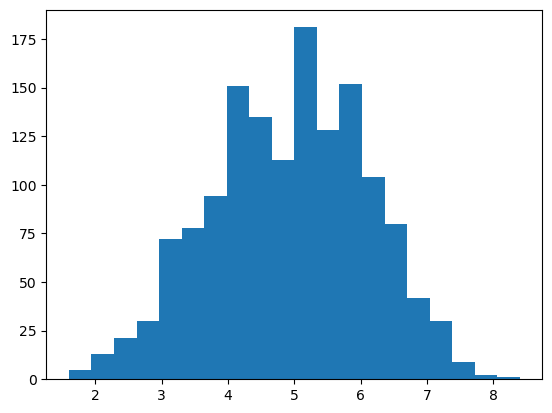

In [5]:
# plot distribution of y_train['valence_mean']
import matplotlib.pyplot as plt

plt.hist(y_train['valence_mean'], bins=20)

## Gradient Boosting Regressor

In [6]:
# grid search for hyperparameters
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.01, 0.025, 0.05, 0.1],
    'max_depth': [2, 3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train.drop(columns=['song_id']), y_train['valence_mean'])

print("For valence_mean:")
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("Test score: ", grid_search.score(X_test.drop(columns=['song_id']), y_test['valence_mean']))



For valence_mean:
Best parameters:  {'learning_rate': 0.025, 'max_depth': 4, 'n_estimators': 250}
Best score:  0.4671438352187147
Test score:  0.4158980441312604


In [7]:
reg = GradientBoostingRegressor(n_estimators=250, 
                                learning_rate=0.025, 
                                max_depth=4, 
                                random_state=42, 
                                loss='squared_error')
# should exclude 'song_id' from X_train
reg.fit(X_train.drop(columns=['song_id']), y_train['valence_mean'])

# on training data
y_train_pred = reg.predict(X_train.drop(columns=['song_id']))

# on test data
y_test_pred = reg.predict(X_test.drop(columns=['song_id']))

# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

print("For valence_mean:")
print("Train MSE: ", mean_squared_error(y_train['valence_mean'], y_train_pred))
print("Train R2: ", r2_score(y_train['valence_mean'], y_train_pred))
print("Test MSE: ", mean_squared_error(y_test['valence_mean'], y_test_pred))
print("Test R2: ", r2_score(y_test['valence_mean'], y_test_pred))

For valence_mean:
Train MSE:  0.24406787141122574
Train R2:  0.8238354049455329
Test MSE:  0.7829182381666908
Test R2:  0.4158980441312604


In [8]:
# grid search for hyperparameters

param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.01, 0.025, 0.05, 0.1],
    'max_depth': [2, 3, 4, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train.drop(columns=['song_id']), y_train['arousal_mean'])

print("For arousal_mean:")
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("Test score: ", grid_search.score(X_test.drop(columns=['song_id']), y_test['arousal_mean']))



For arousal_mean:
Best parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 250}
Best score:  0.5455531049396795
Test score:  0.5081560082633758


In [12]:
reg = GradientBoostingRegressor(n_estimators=250, 
                                learning_rate=0.05, 
                                max_depth=3, 
                                random_state=42, 
                                loss='squared_error')
# should exclude 'song_id' from X_train
reg.fit(X_train.drop(columns=['song_id']), y_train['arousal_mean'])

# on training data
y_train_pred = reg.predict(X_train.drop(columns=['song_id']))

# on test data
y_test_pred = reg.predict(X_test.drop(columns=['song_id']))

# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

print("For arousal_mean:")
print("Train MSE: ", mean_squared_error(y_train['arousal_mean'], y_train_pred))
print("Train R2: ", r2_score(y_train['arousal_mean'], y_train_pred))
print("Test MSE: ", mean_squared_error(y_test['arousal_mean'], y_test_pred))
print("Test R2: ", r2_score(y_test['arousal_mean'], y_test_pred))

For arousal_mean:
Train MSE:  0.27833335054161806
Train R2:  0.8346032317145231
Test MSE:  0.7272665108341547
Test R2:  0.5081560082633758


## XGBoost

In [13]:
# grid search xgboost
import xgboost as xgb

param_grid_xg = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.025, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'alpha': [10, 15, 20]
}

grid_search_xg = GridSearchCV(xgb.XGBRegressor(objective ='reg:squarederror'), param_grid_xg, cv=5, n_jobs=-1)
grid_search_xg.fit(X_train.drop(columns=['song_id']), y_train['valence_mean'])

print("For valence_mean:")
print("Best parameters: ", grid_search_xg.best_params_)
print("Best score: ", grid_search_xg.best_score_)
print("Test score: ", grid_search_xg.score(X_test.drop(columns=['song_id']), y_test['valence_mean']))

For valence_mean:
Best parameters:  {'alpha': 10, 'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}
Best score:  0.4728905382588441
Test score:  0.4249835972939987


In [14]:

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                            colsample_bytree = 0.5,
                            learning_rate = 0.05,
                            max_depth = 4,
                            alpha = 10,
                            n_estimators = 200)

xg_reg.fit(X_train.drop(columns=['song_id']), y_train['valence_mean'])

y_train_pred_xg = xg_reg.predict(X_train.drop(columns=['song_id']))
y_test_pred_xg = xg_reg.predict(X_test.drop(columns=['song_id']))

print("For valence_mean:")
print("Train MSE: ", mean_squared_error(y_train['valence_mean'], y_train_pred_xg))
print("Train R2: ", r2_score(y_train['valence_mean'], y_train_pred_xg))
print("Test MSE: ", mean_squared_error(y_test['valence_mean'], y_test_pred_xg))
print("Test R2: ", r2_score(y_test['valence_mean'], y_test_pred_xg))

For valence_mean:
Train MSE:  0.28787214844069386
Train R2:  0.7922181229168462
Test MSE:  0.7707401497294396
Test R2:  0.4249835972939987


In [15]:
param_grid_xg = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.025, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'alpha': [10, 15, 20]
}

grid_search_xg = GridSearchCV(xgb.XGBRegressor(objective ='reg:squarederror'), param_grid_xg, cv=5, n_jobs=-1)
grid_search_xg.fit(X_train.drop(columns=['song_id']), y_train['arousal_mean'])

print("For arousal_mean:")
print("Best parameters: ", grid_search_xg.best_params_)
print("Best score: ", grid_search_xg.best_score_)
print("Test score: ", grid_search_xg.score(X_test.drop(columns=['song_id']), y_test['arousal_mean']))

/home/user/miniforge3/envs/musinf/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


For arousal_mean:
Best parameters:  {'alpha': 10, 'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 250}
Best score:  0.5409571850553898
Test score:  0.5706059664485442


In [17]:

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                            colsample_bytree = 0.7,
                            learning_rate = 0.05,
                            max_depth = 4,
                            alpha = 10,
                            n_estimators = 250)

xg_reg.fit(X_train.drop(columns=['song_id']), y_train['arousal_mean'])

y_train_pred_xg = xg_reg.predict(X_train.drop(columns=['song_id']))
y_test_pred_xg = xg_reg.predict(X_test.drop(columns=['song_id']))

print("For arousal_mean:")
print("Train MSE: ", mean_squared_error(y_train['arousal_mean'], y_train_pred_xg))
print("Train R2: ", r2_score(y_train['arousal_mean'], y_train_pred_xg))
print("Test MSE: ", mean_squared_error(y_test['arousal_mean'], y_test_pred_xg))
print("Test R2: ", r2_score(y_test['arousal_mean'], y_test_pred_xg))

For arousal_mean:
Train MSE:  0.22439170333025227
Train R2:  0.8666575080252635
Test MSE:  0.6349247033624333
Test R2:  0.5706059664485442
